In [230]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

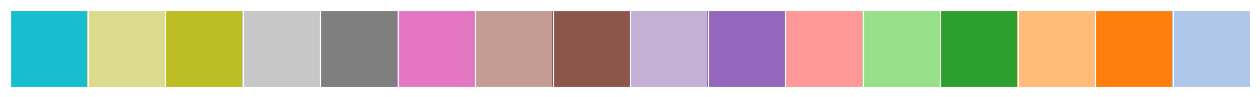

In [252]:
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

In [231]:
cwd = os.getcwd()

# Iteration 1 - Etude du bruit et d'un son

# A Etude du bruit

Avant de commencer à réfléchir à un quelconque test de detection de son, vous décidez d'étudier le bruit de fond. Le bruit c'est en fait tout ce qui ne vous intéresse pas, une fluctuation très faiblement audible (écouter le fichier wav) et qui ne vous dérange pas pendant votre sommeil (vous vivez dans un endroit calme). Ce qui vous intéresse in fine, ce sont les sons (on distingue donc bien les notions de son et de bruit). Mais pour espérer les détecter des **sons**, il vous faut d'abord caractériser **le bruit**.

##  A.0 - Ecouter le fichier "bruit.wav" dans un lecteur audio

## A.1 - Importer le bruit "bruit_seul.txt" dans un array numpy

Vous pouvez utiliser la fonction loadtxt de numpy

In [180]:
bruit_seul_txt = "bruit_seul.txt"
son_txt = "son.txt"

In [181]:
os.chdir(cwd)
os.chdir(cwd+"/Data")

bruit = np.loadtxt(bruit_seul_txt)
son = np.loadtxt(son_txt)


os.chdir(cwd)

In [182]:
df_bruit = pd.DataFrame(bruit, columns = ['bruit_freq'])
df_son = pd.DataFrame(son, columns = ['son_freq'])

### Analyses des dataframe

In [183]:
print(df_son.shape,df_bruit.shape)

(1000000, 1) (1000000, 1)


In [184]:
#df_bruit_seul.dtypes
df_son.dtypes

son_freq    float64
dtype: object

In [185]:
print(df_son.value_counts().idxmax(), df_bruit.value_counts().idxmax())

(-5.3159256969415605,) (-5.3159256969415605,)


In [186]:
df_son.head()

,son_freq
0,0.276235
1,-0.237085
2,-1.098637
3,0.049679
4,-0.109675


In [187]:
print("---------> df_son information")
display(df_son.describe())
print("---------> df_bruit information")
display(df_son.describe())

---------> df_son information


,son_freq
count,1000000.000000
mean,0.000903
std,1.003336
min,-5.315926
25%,-0.675015
50%,-0.000128
75%,0.676895
max,5.736037


---------> df_bruit information


,son_freq
count,1000000.000000
mean,0.000903
std,1.003336
min,-5.315926
25%,-0.675015
50%,-0.000128
75%,0.676895
max,5.736037


## A.2 - Plotter l'amplitude mesurée (en vr) en fonction du temps pour la première seconde d'enregistrement
On rappelle que la fréquence d'échantillonnage est 48 kHz

In [188]:
freq_ech = 48000 #Frequence en Hz

<AxesSubplot:>

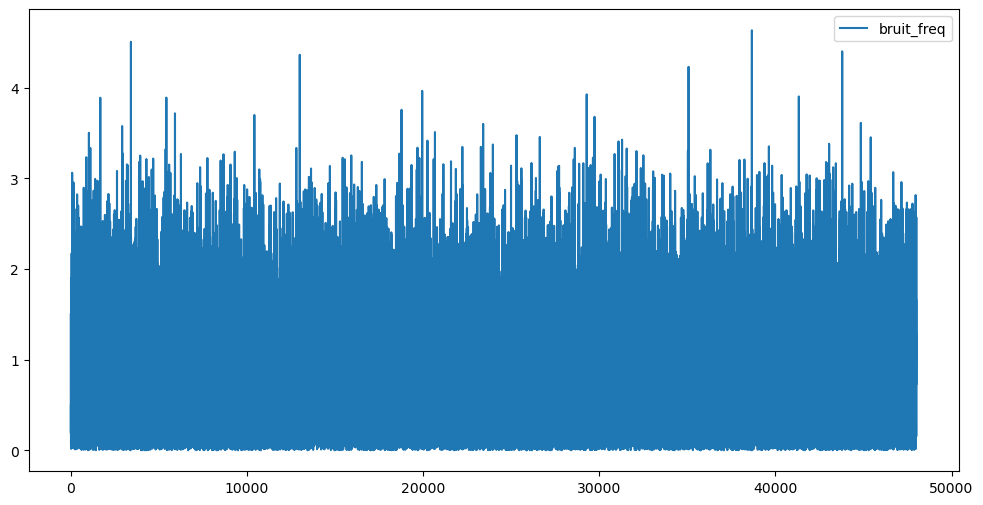

In [189]:
df_bruit.loc[:48000].abs().plot(figsize=(12,6))

In [190]:
def add_new_index(df):
    duration = len(df) / freq_ech
    # Create a new index with a frequency of 1 sample per 48000 Hz
    new_index = pd.Index(np.arange(0, duration, 1/freq_ech), name='time')
    df = df.set_index(new_index)
    return df

In [191]:
df_son = add_new_index(df_son)
df_bruit = add_new_index(df_bruit)
df_son_index
print("On retrouve bien notre enregistrement de 20s")
df_bruit

On retrouve bien notre enregistrement de 20s


,bruit_freq
time,
0.000000,0.492209
0.000021,0.189033
0.000042,1.509044
0.000063,0.677286
0.000083,-0.402110
...,...
20.833229,-0.500145
20.833250,-0.288808
20.833271,-0.142364


### Amplitude absolue premiere seconde

,bruit_freq
time,
0.000000,0.492209
0.000021,0.189033
0.000042,1.509044
0.000063,0.677286
0.000083,-0.402110


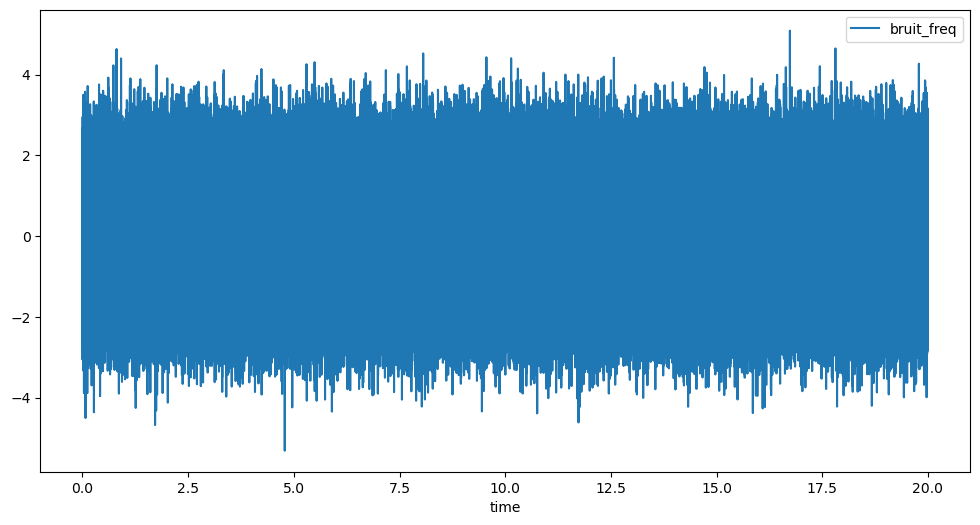

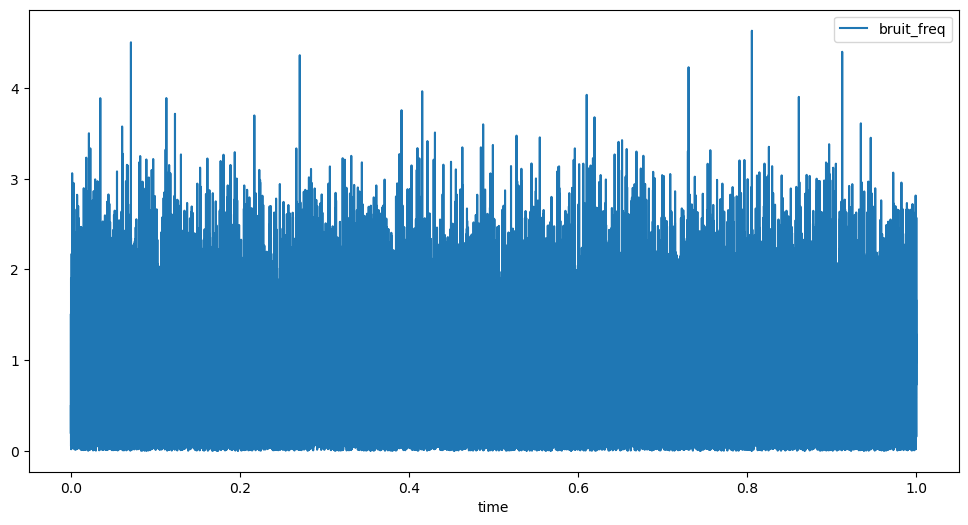

In [192]:
df_bruit.loc[:20].plot(figsize=(12,6))
df_bruit.loc[:1].abs().plot(figsize=(12,6))
df_bruit.head()

## A.3 - Afficher les probability density function (PDF) et  la cumulative distribution function (CDF) empiriques de l'amplitude du bruit en va

In [193]:
df_bruit.abs()

,bruit_freq
time,
0.000000,0.492209
0.000021,0.189033
0.000042,1.509044
0.000063,0.677286
0.000083,0.402110
...,...
20.833229,0.500145
20.833250,0.288808
20.833271,0.142364


In [194]:
df_bruit.abs().cumsum()

,bruit_freq
time,
0.000000,0.492209
0.000021,0.681243
0.000042,2.190287
0.000063,2.867573
0.000083,3.269684
...,...
20.833229,797885.063824
20.833250,797885.352633
20.833271,797885.494996


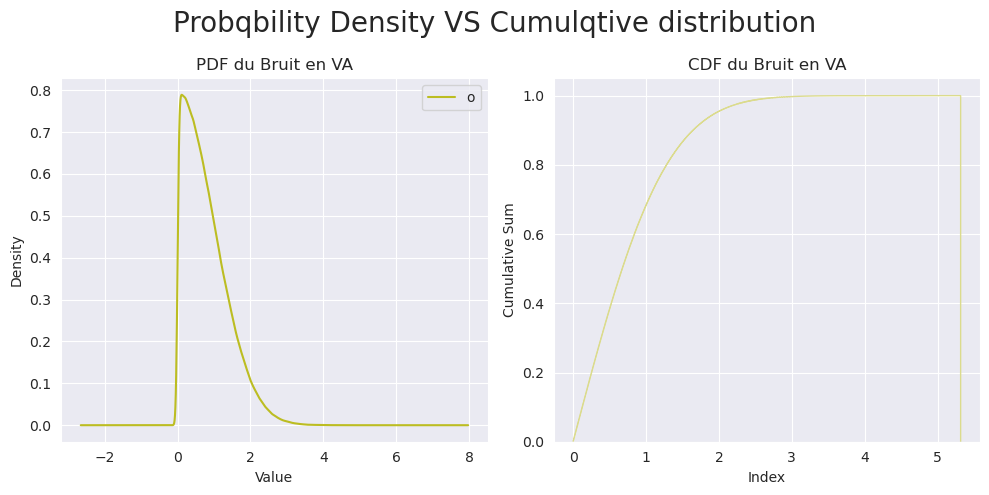

In [257]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle("Probqbility Density VS Cumulqtive distribution", fontsize=20)
sns.set_style("darkgrid")

df = df_bruit

# plot the probability density on the right axis
df_bruit.abs().plot(
    ax=axs[0],
    kind='density',
    color=colors[2]
)

axs[0].set_title('PDF du Bruit en VA')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')
axs[0].legend("oui")


# plot the cumulative shape on the left axis
df_bruit.abs().hist(
    ax=axs[1],
    bins=1000, 
    histtype='step', 
    density=True,
    cumulative=1,
    label='Reversed emp.',
    color=colors[1]
)

axs[1].set_title('CDF du Bruit en VA')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Cumulative Sum')


# adjust the layout and display the plot
plt.tight_layout()
plt.show()

## A.4 - Identifier les 2 lois de probabilités obtenues à la question précédente 

### a - Pouvez-vous identifier les 2 fonctions ?

Au vu de la forme des 2 fonctions, à quelles fonction analytiques ressemblent-elles ? Si vous avez une idée précise, identifiez la et donnez ses coefficients caractéristiques.
Sinon rendez-vous question suivante :)

In [196]:
df_bruit.abs().describe()

,bruit_freq
count,1000000.000000
mean,0.797887
std,0.602644
min,0.000002
25%,0.318673
50%,0.674425
75%,1.150025
max,5.315926


### b - Calculez la moyenne et l'écart type du bruit (pas en valeur absolue cette fois)
Info : la classe `nd_array` du module `numpy` possède des méthodes qui font ça directement.

In [232]:
df_bruit.describe()

,bruit_freq
count,1000000.000000
mean,0.002100
std,0.999899
min,-5.315926
25%,-0.672359
50%,0.000987
75%,0.676680
max,5.086007


### c - 1 - Sur le même graphe, affichez la PDF de $ \mid bruit \mid $ et la gaussienne de moyenne et d'écart type calculée question précédente

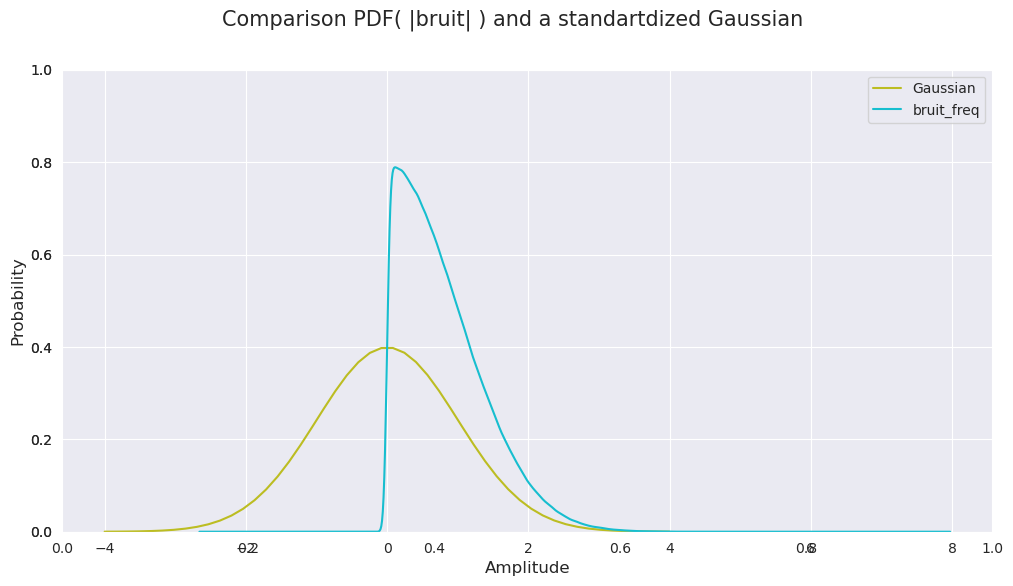

In [266]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Comparison PDF( |bruit| ) and a standartdized Gaussian", fontsize=15)
sns.set_style("darkgrid")
ax = fig.subplots()

df_bruit_mean = df_bruit.mean()[0]
df_bruit_std = df_bruit.std()[0]
 
# Calculating probability density function (PDF)
x=np.linspace(-4,4)
pdf = stats.norm.pdf(x, df_mean, df_std)

# Drawing a graph
ax.plot(x,
        pdf, 
        color=colors[2],
        label="Gaussian"
       )
df_bruit.abs().plot(
    ax=ax,
    kind='density',
    color=colors[0],
    label="PDF - |bruit|"
)
ax.set_ylim([0, 1])
ax.set_xlabel("Amplitude", size=12)    
ax.set_ylabel("Probability", size=12)     
ax.legend()

plt.show()

### c - 2 - Expliquez la différence entre les deux courbes.


## A.5 - Evaluer la probabilité des amplitudes du bruit pour différentes plages d'amplitudes

Ici comme très souvent on différencie le bruit du son. Le bruit est une fluctuation statistique, alors que le son est porteur d'information.

On va considérer dans la suite de cette itération que le bruit est parfaitement caractérisé par une loi demi-normale, de moyenne $\mu =0$ et d'écart type $\sigma = 1 $. Sa fonction de densité (PDF) est :
$$ f(x) = \frac{2}{\sigma \sqrt{2 \pi}} \mathrm{e}^{- \frac{1}{2} \left( \frac{ (x - \mu)^2}{\sigma^2} \right)  }$$

On utilisera donc pour répondre aux questions suivantes (A.5) les CDF et PDF analytiques (c'est à dire théoriques) puisque l'on fait l'hypothèse que notre bruit est régi par une distribution demi-normale.

Vous pouvez explorer la doc de scipy.stats pour trouver les fonctions associées à diverses distributions : https://docs.scipy.org/doc/scipy/tutorial/stats.html

### a -  Donner la formule analytique de la fonction de répartition (CDF) de la loi demi-normale
(Pour les plus matheux elle peut se déduire de la PDF, sinon wikipedia est votre ami).

On va considérer dans la suite de cette itération que le bruit est parfaitement caractérisé par une loi demi-normale, de moyenne $\mu =0$ et d'écart type $\sigma = 1 $. Sa fonction de densité (PDF) est :
$$ f(x) = 2* \frac{2}{\sigma \sqrt{2 \pi}} \mathrm{e}^{- \frac{1}{2} \left( \frac{ (x)^2}{\sigma^2} \right)  } si x>0$$
$$ 0, si x<0 $$

### b - 1 Probabilités sur les amplitudes du bruit

* Quelle est la probabilité d'observer des amplitudes comprises dans $[0 , \sigma]$  ?
* Même question pour $[0 , 2\sigma]$
* Même question pour $[0, 3\sigma]$


In [267]:
mu = 0
sigma = 1

In [271]:
def prob_interval(val_inf, val_sup):

    a = val_inf
    b = val_sup

    dist = stats.halfnorm(scale=sigma, loc=mu)
    prob = dist.cdf(b) - dist.cdf(a)
    return prob

In [282]:
print(f"{round(prob_interval(0,sigma),4)} %")
print(f"{round(prob_interval(0,2*sigma),4)} %")
print(f"{round(prob_interval(0,3*sigma),4)} %")

0.6827 %
0.9545 %
0.9973 %


### b - 2 Probabilités sur les amplitudes du bruit

À l'inverse on s'intéresse maintenant aux amplitudes comprises dans l'intervalle  $[a,\infty]$ (avec $a > 0$).

Déterminer les valeur de a pour que la probabilité de d'observer une amplitude supérieure à $a$ (donc comprise dans $[a,\infty]$) soit de :

- 5 %
- 1%
- 0.1%


In [303]:
def find_a_given_prob(prob):
    a=0
    probTemp=1
    while probTemp > prob :
        probTemp = stats.halfnorm.sf(a, scale=sigma, loc=mu)
        a += 0.001
    print(f"a = {a} --> probabilty : {probTemp}")    
    return a

In [304]:
find_a_given_prob(0.05)
find_a_given_prob(0.01)
find_a_given_prob(0.001)

a = 1.9609999999998948 --> probabilty : 0.04999579029645318
a = 2.576999999999827 --> probabilty : 0.009995064631475037
a = 3.2919999999997485 --> probabilty : 0.0009983191327647134


3.2919999999997485

# B - Etude d'un son

Vous avez réalisé un enregistrement pendant la nuit. En inspectant rapidement la courbe amplitude(temps), il vous semble voir quelque chose de particulier, et vous soupçonnez fortement qu'il ne s'agisse pas du bruit mais d'un son (une tentative d'effraction ?). Vous trouverez l'extrait en question dans le fichier "son.wav".